# Customer Churn Analysis Project

This notebook analyzes customer churn using a dataset from Kaggle. The goal is to understand the factors influencing churn and build predictive models.

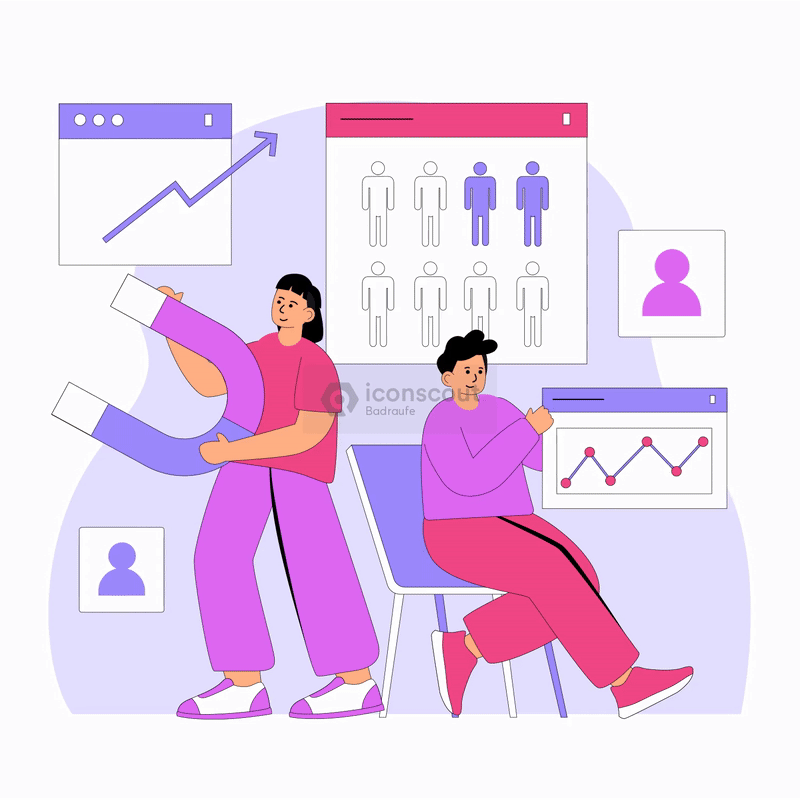


## Load Data & Initial Exploration

In [120]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
# Displaying the plot
plt.style.use('fivethirtyeight')

In [3]:
# Loading the dataset
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
# Displaying the first few rows of the dataset
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [5]:
df.shape

(7043, 21)

In [6]:
# Displaying dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.drop('customerID',inplace=True,axis=1)

In [8]:
# Displaying the first few rows of the dataset
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [9]:
# Counting unique values in a column
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.gender.value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

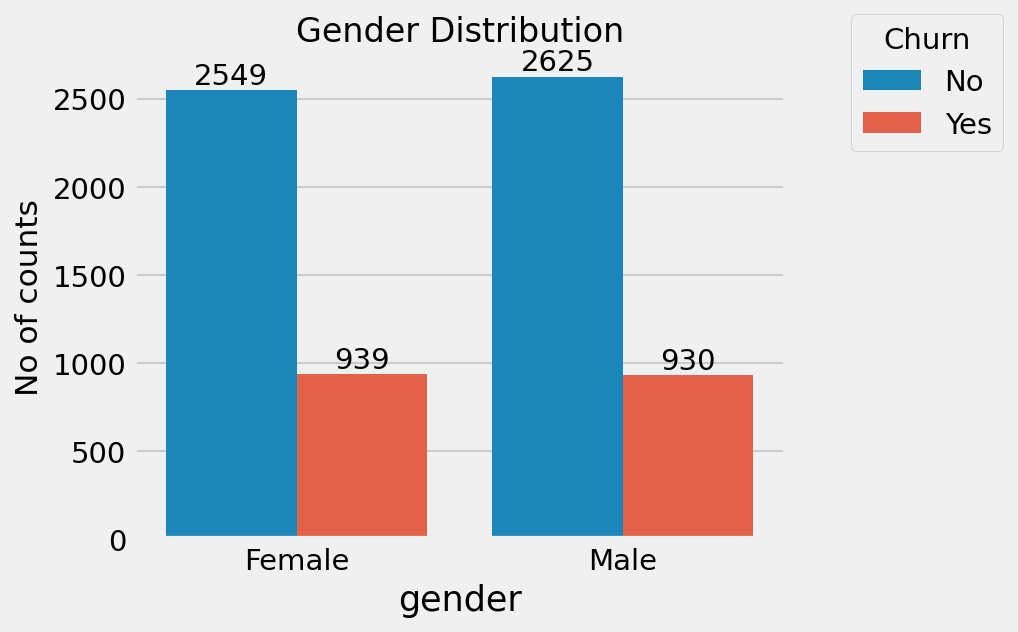

In [57]:
# Displaying the plot

plt.figure(figsize=(5,4),dpi=150)
ax=sns.countplot(data=df,x='gender',hue='Churn');
plt.ylabel('No of counts',fontsize=15);
plt.title('Gender Distribution', fontsize=16)
plt.xticks(ha='center');

for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(loc=(1.1,0.8),title='Churn');


## Female customer has more churn out then male

In [12]:
# Counting unique values in a column
df.SeniorCitizen.value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [13]:
def conv(value):
    if value==1:
        return "Yes"
    return "No"


df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [14]:
# Counting unique values in a column after converting into int
df.SeniorCitizen.value_counts()

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

In [15]:
for col in df:
    if col not in ['tenure','MonthlyCharges','TotalCharges']:
        print(col,df[col].unique())
        print('------------------------------------------')

gender ['Female' 'Male']
------------------------------------------
SeniorCitizen ['No' 'Yes']
------------------------------------------
Partner ['Yes' 'No']
------------------------------------------
Dependents ['No' 'Yes']
------------------------------------------
PhoneService ['No' 'Yes']
------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
------------------------------------------
StreamingTV ['No' 'Yes' 'No internet service']
------------------------------------------
StreamingMovies ['No' 'Yes' 

In [16]:
# Checking for missing values in the dataset
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
for col in ['tenure','MonthlyCharges','TotalCharges']:
    print(col,len(df[df[col]==' ']))
    print('-------------------------------')

tenure 0
-------------------------------
MonthlyCharges 0
-------------------------------
TotalCharges 11
-------------------------------


In [18]:
df['TotalCharges']= df['TotalCharges'].replace({" ":"0.0"}).astype(float)

In [19]:
for col in ['tenure','MonthlyCharges','TotalCharges']:
    print(col,len(df[df[col]==' ']))
    print('-------------------------------')

tenure 0
-------------------------------
MonthlyCharges 0
-------------------------------
TotalCharges 0
-------------------------------


In [20]:
# Displaying dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [21]:
# Counting unique values in a column
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# Exploratory Data Analysis

In [22]:
df.shape

(7043, 20)

In [23]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
# Summary statistics for numerical columns
df.describe().T

count         mean          std    min     25%      50%  \
tenure          7043.0    32.371149    24.559481   0.00    9.00    29.00   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.50    70.35   
TotalCharges    7043.0  2279.734304  2266.794470   0.00  398.55  1394.55   

                    75%      max  
tenure            55.00    72.00  
MonthlyCharges    89.85   118.75  
TotalCharges    3786.60  8684.80

In [72]:
def plot_distribution(df,column_name):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    sns.histplot(data=df,x=column_name,kde=True,multiple='stack')
    plt.title(f'Distribution of {column_name}',fontsize=15)

    col_mean=df[column_name].mean()
    col_median=df[column_name].median()

    plt.axvline(col_mean,color='red',label='Mean',ls='--')
    plt.axvline(col_median,color='blue',label='Median',ls='--')
    plt.legend()
    
    plt.subplot(1,2,2)
    sns.boxplot(data=df,x=column_name)
    plt.title(f'Boxplot of {column_name}',fontsize=15)
    plt.show()

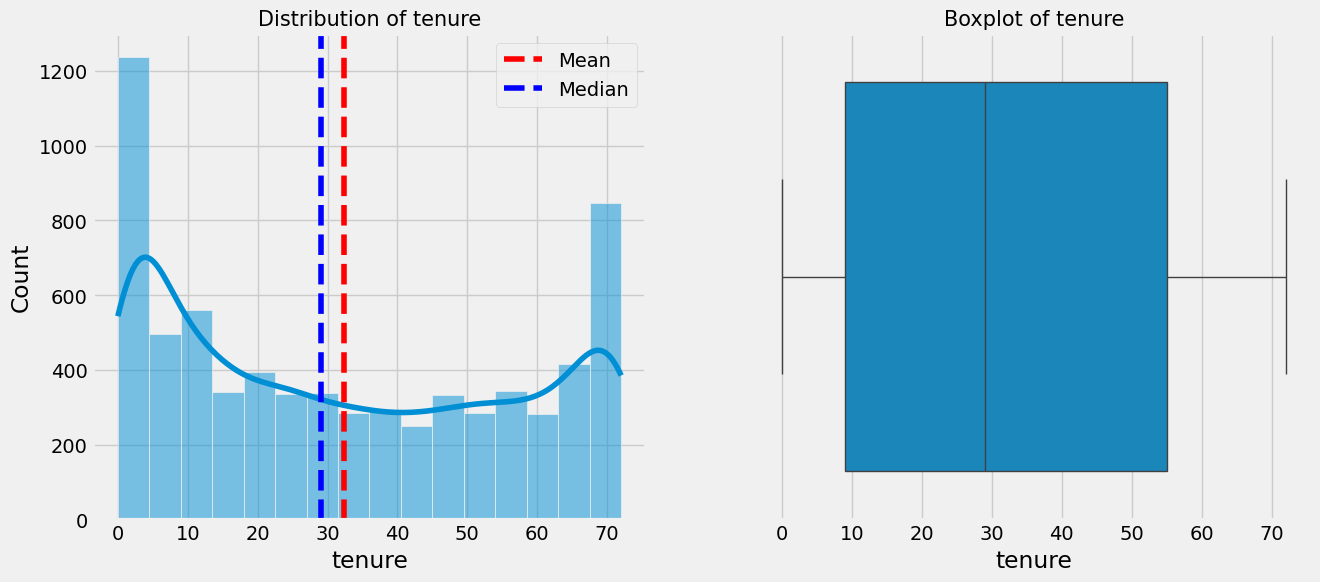

In [73]:
plot_distribution(df,'tenure')

##  Customers in the first 12 months have the highest churn rate (e.g. 40%).

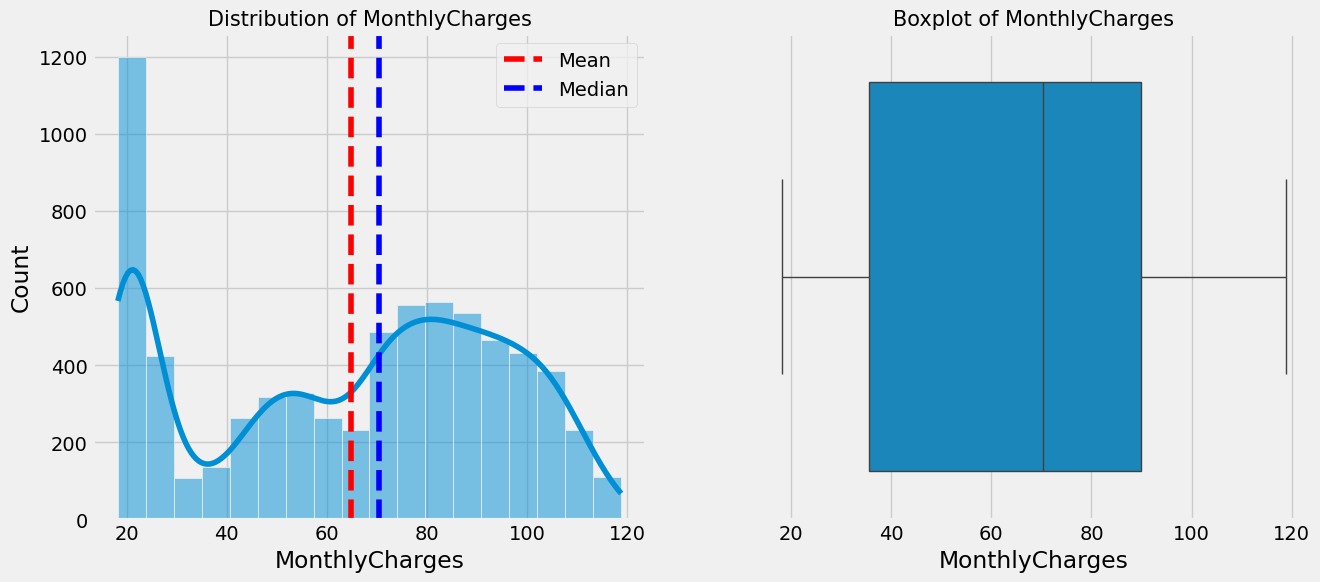

In [68]:
plot_distribution(df,'MonthlyCharges')

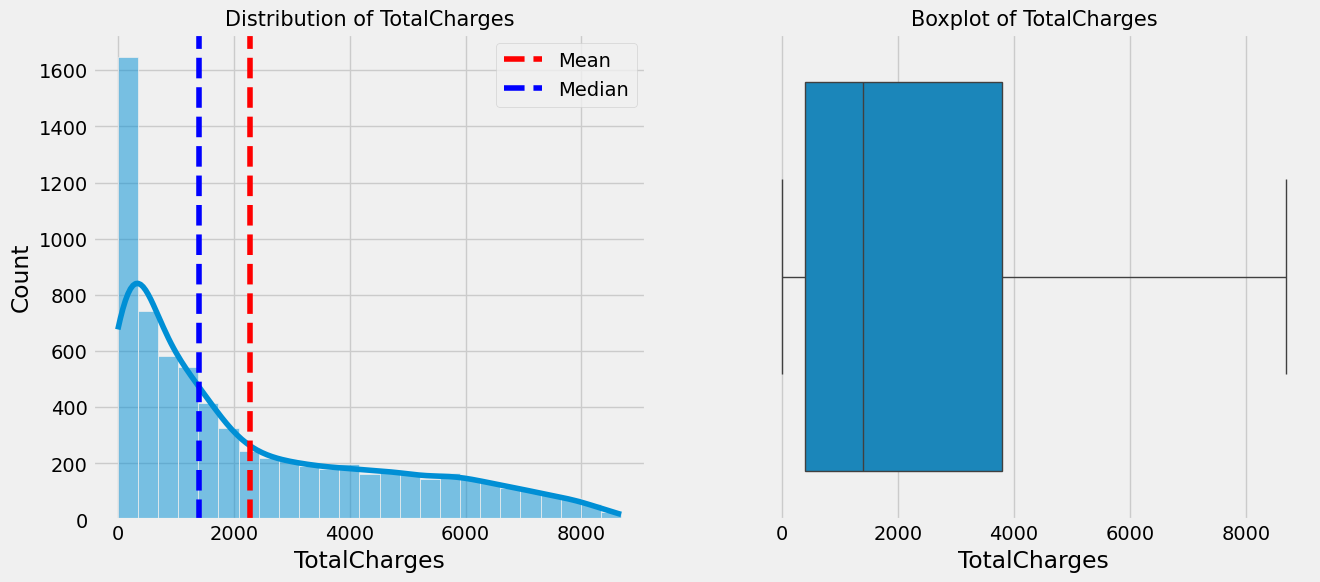

In [69]:
plot_distribution(df,'TotalCharges')

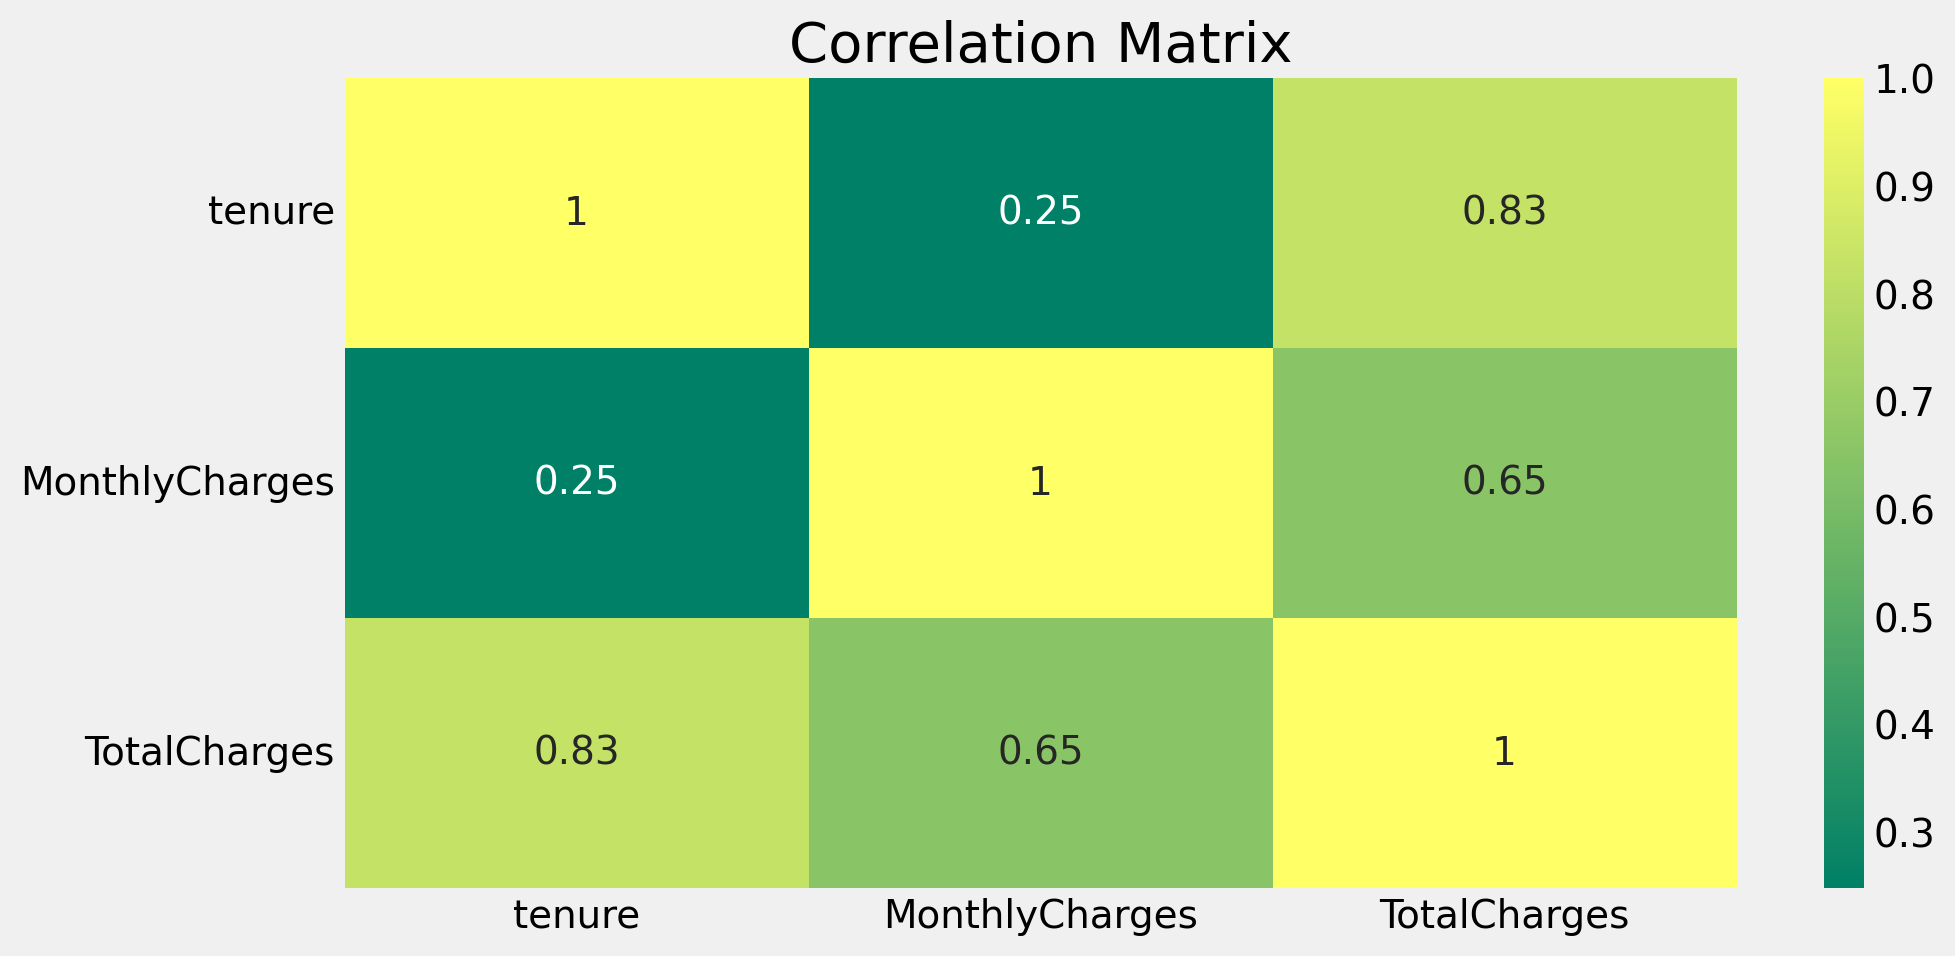

In [29]:
plt.figure(figsize=(10,5),dpi=200)
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True,cmap='summer')
plt.title('Correlation Matrix')
plt.show()

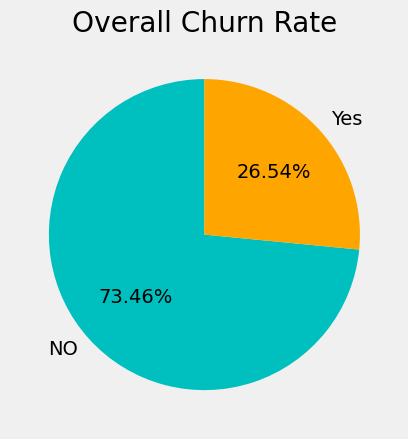

In [40]:
# Counting unique values in a column
churn_rate=df['Churn'].value_counts()
plt.pie(churn_rate,labels=['NO','Yes'],autopct="%1.2f%%",startangle=90,colors=['c','orange']);
plt.title('Overall Churn Rate');

# 26% Customers have churn out

In [61]:
# Function to calculate churn rate by a given column
def churn_rate_by_segment(column):
    rate = df.groupby(column)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
    return rate

print('----------------------------------')
# Churn rate by Partner status
print("\nChurn Rate by Partner:")
print(churn_rate_by_segment('Partner'))

print('----------------------------------')
# Churn rate by Dependents
print("\nChurn Rate by Dependents:")
print(churn_rate_by_segment('Dependents'))


----------------------------------

Churn Rate by Partner:
Churn           No        Yes
Partner                      
No       67.042021  32.957979
Yes      80.335097  19.664903
----------------------------------

Churn Rate by Dependents:
Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.549763  15.450237


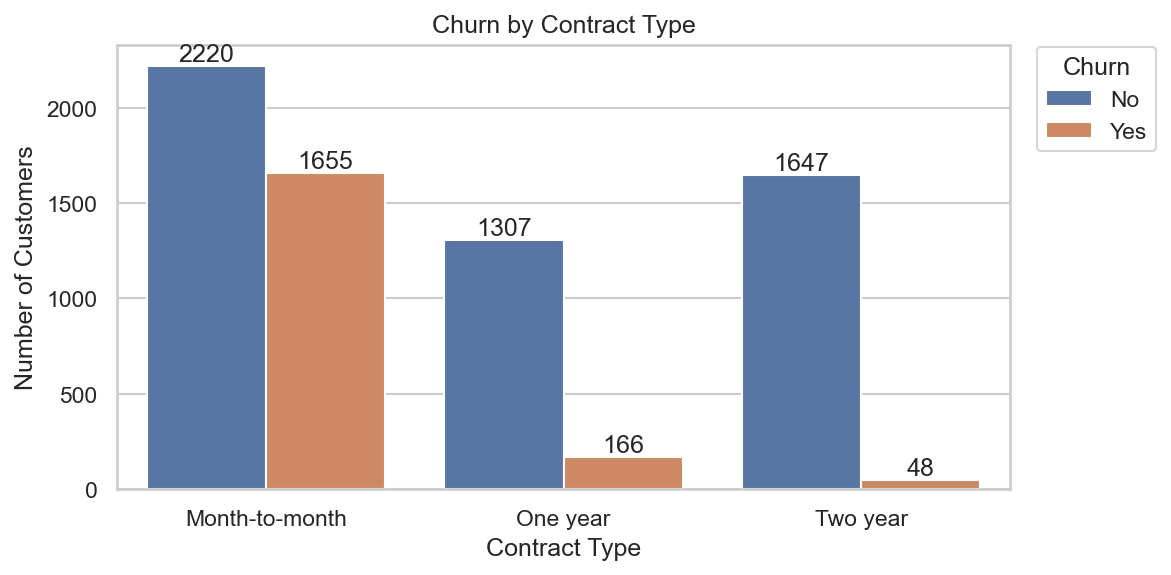

In [118]:
plt.figure(figsize=(8,4),dpi=150)
ax=sns.countplot(data=df,x='Contract',hue='Churn');
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn',loc=(1.03,0.76))
plt.tight_layout()
plt.show()

## Lower churn in yearly contracts means those customers are more “locked in” or satisfied, while high churn in month-to-month means they’re at higher risk of leaving

In [119]:
chunked_services=df.groupby(['PhoneService','MultipleLines','InternetService'])['Churn'].value_counts(normalize=True).unstack().fillna(0)*100
chunked_services.reset_index()

Churn PhoneService     MultipleLines InternetService         No        Yes
0               No  No phone service             DSL  75.073314  24.926686
1              Yes                No             DSL  79.389313  20.610687
2              Yes                No     Fiber optic  54.231434  45.768566
3              Yes                No              No  91.300676   8.699324
4              Yes               Yes             DSL  89.435601  10.564399
5              Yes               Yes     Fiber optic  60.423117  39.576883
6              Yes               Yes              No  97.076023   2.923977

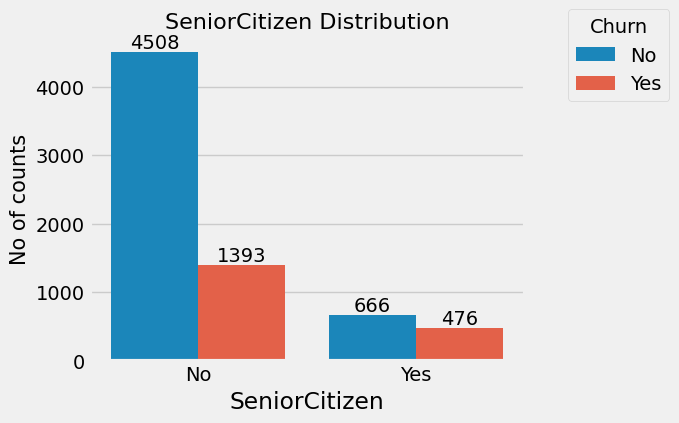

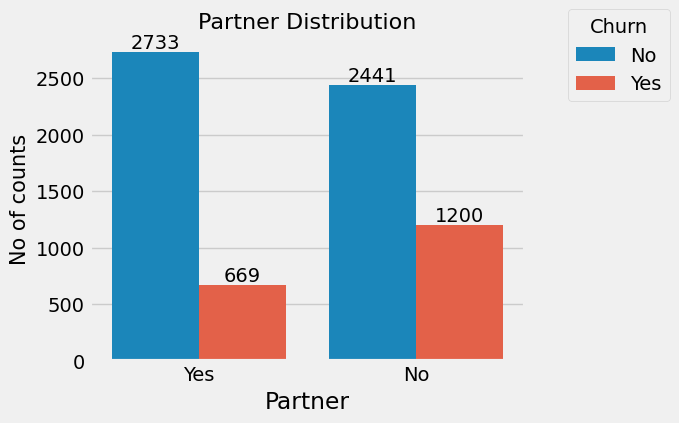

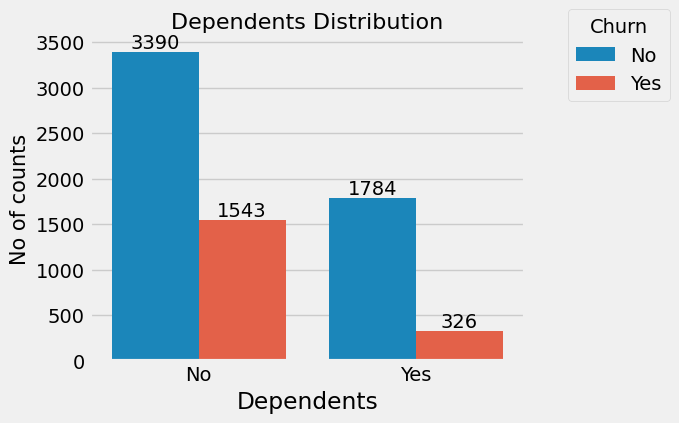

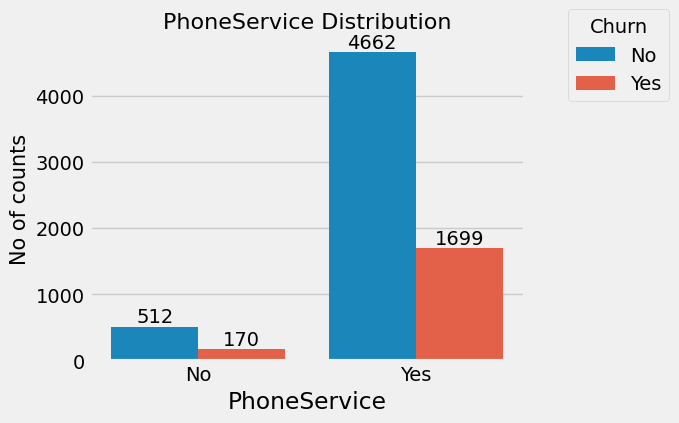

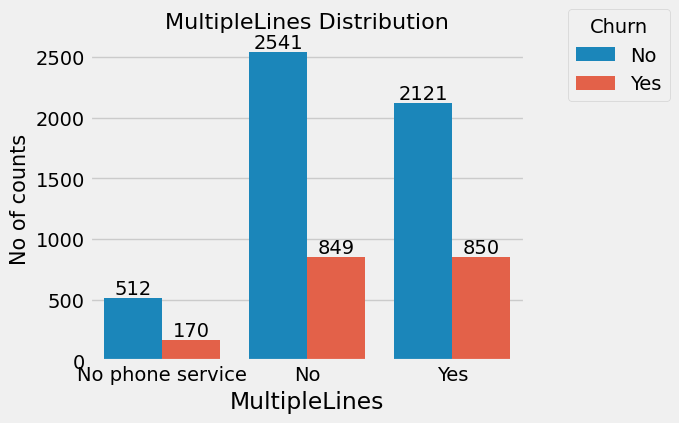

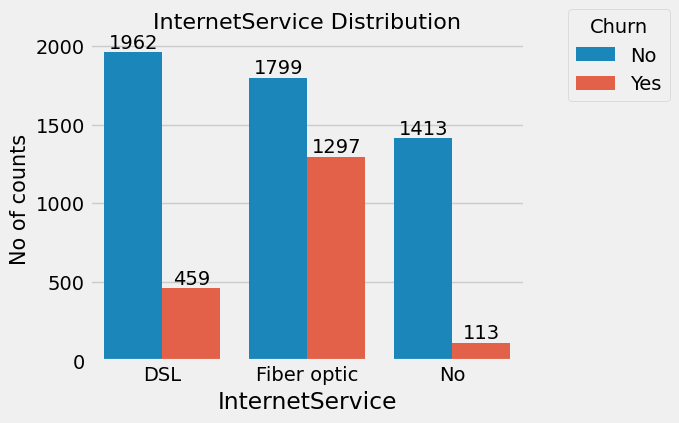

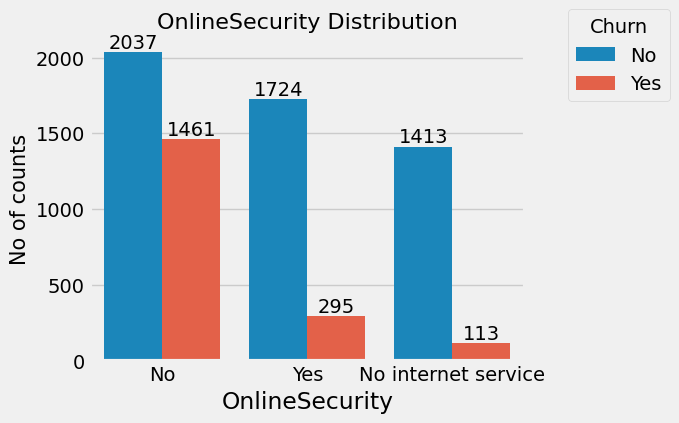

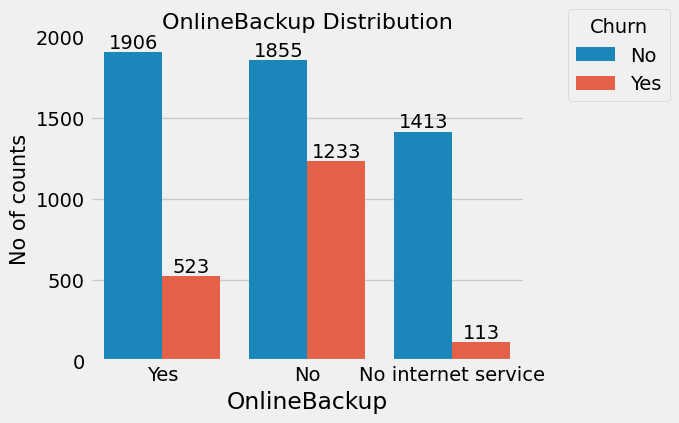

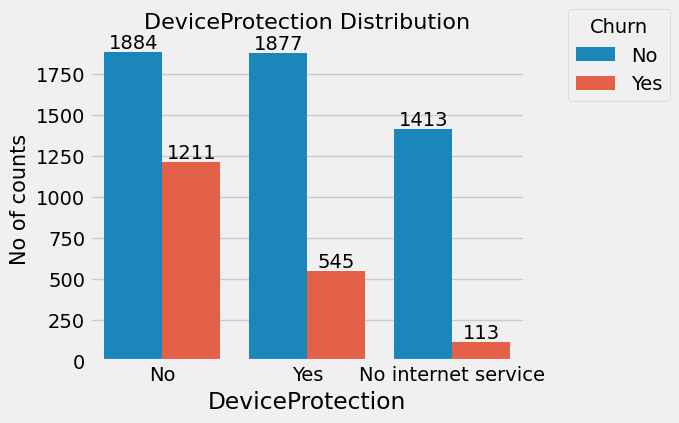

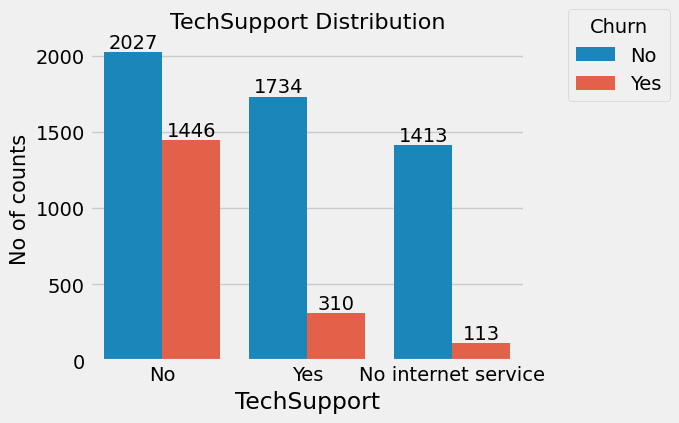

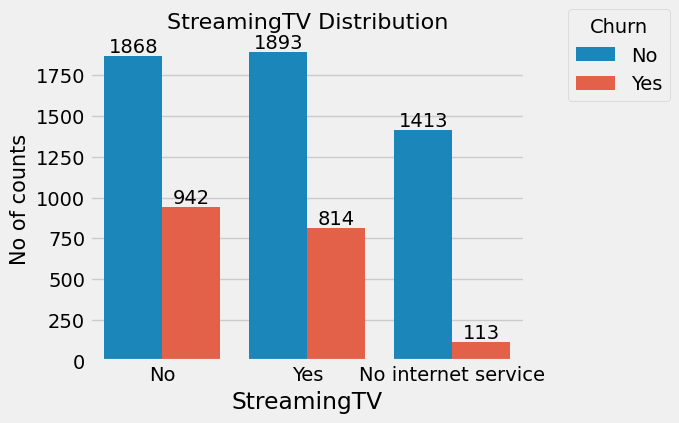

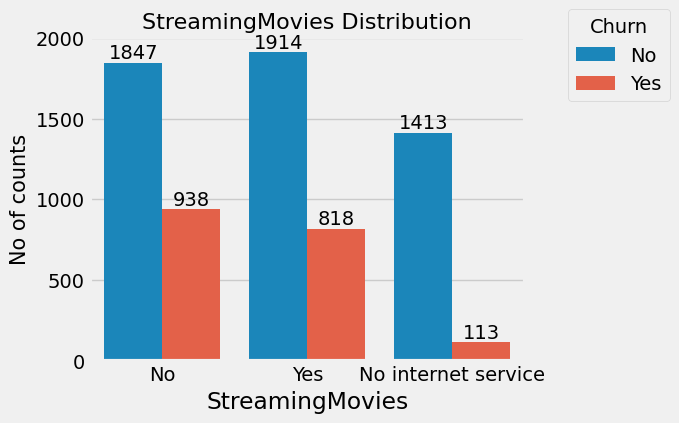

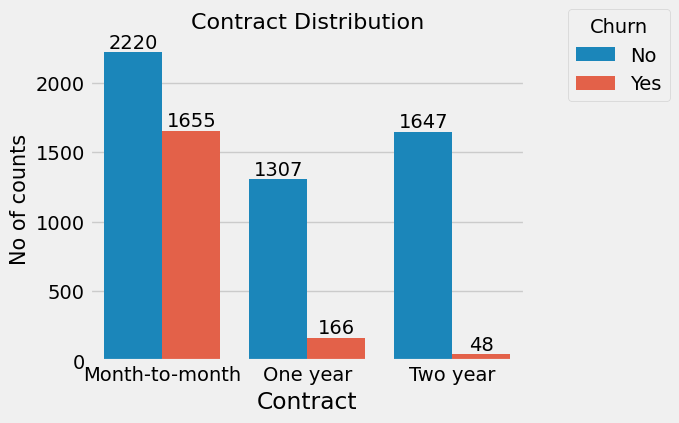

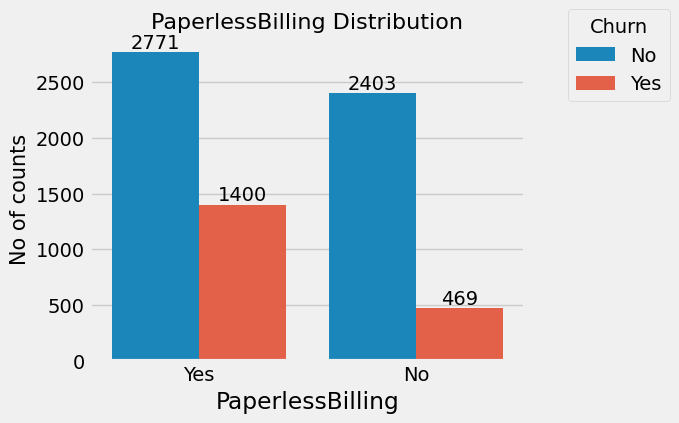

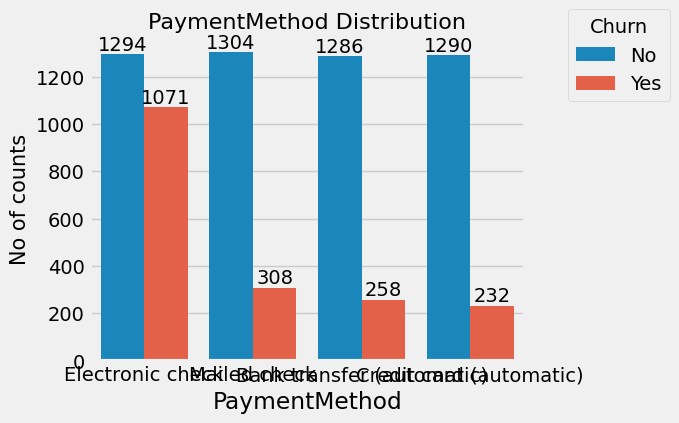

C:\Users\vk059\AppData\Local\Temp\ipykernel_9764\3872292622.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=(1.1,0.8),title='Churn')


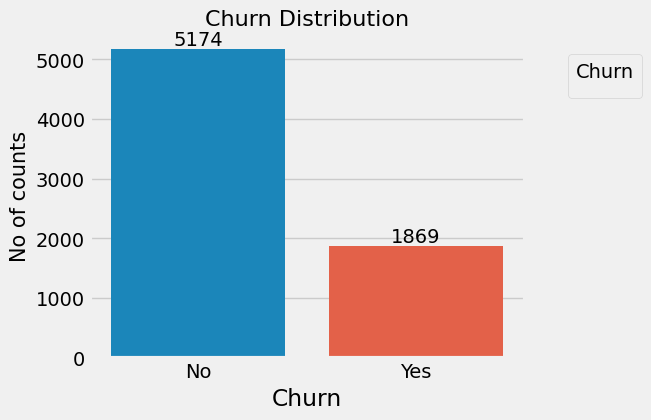

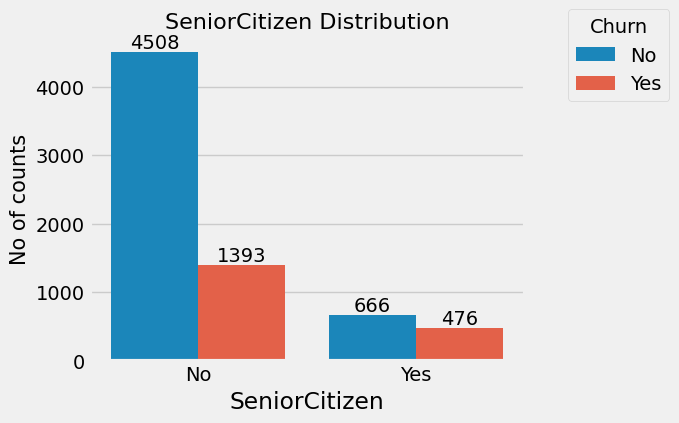

In [76]:
categorical_cols=df.select_dtypes(include='object').columns.to_list()+ ['SeniorCitizen']

for col in categorical_cols:
    if col in ['gender']:
        continue
    plt.figure(figsize=(5,4))
    ax=sns.countplot(data=df,x=col,hue='Churn');
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.ylabel('No of counts',fontsize=15);
    plt.title(f'{col} Distribution', fontsize=16)
    plt.xticks(ha='center');
    plt.legend(loc=(1.1,0.8),title='Churn')
    plt.show()